In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('vam_example_data.csv')
print(df.shape)
df.head()

(2500, 4)


,X,D,theta_D,Y
0,-0.733704,31,0.350245,-1.035723
1,-1.044782,30,-0.215716,-2.031859
2,-1.216304,3,-0.107785,0.017917
3,-0.492224,36,-0.300190,0.008402
4,-0.651327,2,0.223767,-0.507587


In [ ]:
df.sort_values(by='D', inplace=True)
df.head()

,X,D,theta_D,Y
2499,0.364627,1,0.277976,-0.138034
1194,0.869787,1,0.277976,2.057647
1197,1.545956,1,0.277976,2.321573
1388,-0.652015,1,0.277976,0.667854
138,0.422915,1,0.277976,0.546177


In [ ]:
np.sort(df.D.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
df.D = df.D.astype(str)
df.dtypes

X          float64
D           object
theta_D    float64
Y          float64
dtype: object

In [ ]:
df.describe()

,X,theta_D,Y
count,2500.000000,2500.000000,2500.000000
mean,-0.025034,0.001707,-0.033906
std,0.990085,0.204668,1.440887
min,-3.268543,-0.428368,-4.754248
25%,-0.659780,-0.133214,-1.037642
50%,-0.026171,-0.039721,0.001377
75%,0.642331,0.119408,0.911576
max,3.176627,0.572012,4.447432


<Axes: >

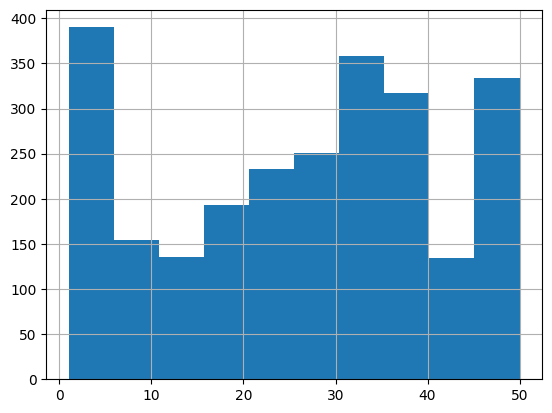

In [ ]:
df.D.astype(int).hist()

In [ ]:
df.head(2)

,X,D,theta_D,Y
2499,0.364627,1,0.277976,-0.138034
1194,0.869787,1,0.277976,2.057647


In [ ]:
def reg(formula, data):
  model = smf.ols(formula=formula, data=data)
  fitted_model = model.fit(cov_type='HC1')
  data1 = {'coef': fitted_model.params,
        'std err': fitted_model.bse,
        't': fitted_model.tvalues,
        'P>|t|': fitted_model.pvalues,
        '[0.025': fitted_model.conf_int()[0],
        '0.975]': fitted_model.conf_int()[1]}
  return(pd.DataFrame(data1))



In [ ]:
ols_uncontrolled = reg(formula='Y ~ D + 0', data=df)
print(ols_uncontrolled.shape)
print(ols_uncontrolled.head())

(50, 6)
           coef   std err         t     P>|t|    [0.025    0.975]
D[1]   0.308412  0.172016  1.792921  0.072986 -0.028734  0.645558
D[10] -0.304670  0.354515 -0.859398  0.390121 -0.999507  0.390167
D[11]  0.206369  0.240280  0.858868  0.390413 -0.264572  0.677310
D[12] -0.514546  0.253905 -2.026529  0.042711 -1.012191 -0.016901
D[13] -0.069645  0.224320 -0.310474  0.756201 -0.509305  0.370014


In [ ]:
form = 'Y ~ D + X + 0'
ols_controlled = reg(formula= form, data=df)
print(ols_controlled.shape)
print(ols_controlled.head())
print(ols_controlled.index)

(51, 6)
           coef   std err         t     P>|t|    [0.025    0.975]
D[1]   0.188254  0.134381  1.400889  0.161247 -0.075129  0.451636
D[10] -0.346097  0.260715 -1.327491  0.184346 -0.857089  0.164895
D[11] -0.053692  0.153149 -0.350584  0.725900 -0.353858  0.246475
D[12] -0.265262  0.161376 -1.643744  0.100229 -0.581554  0.051030
D[13] -0.129105  0.239206 -0.539724  0.589388 -0.597942  0.339731
Index(['D[1]', 'D[10]', 'D[11]', 'D[12]', 'D[13]', 'D[14]', 'D[15]', 'D[16]',
       'D[17]', 'D[18]', 'D[19]', 'D[2]', 'D[20]', 'D[21]', 'D[22]', 'D[23]',
       'D[24]', 'D[25]', 'D[26]', 'D[27]', 'D[28]', 'D[29]', 'D[3]', 'D[30]',
       'D[31]', 'D[32]', 'D[33]', 'D[34]', 'D[35]', 'D[36]', 'D[37]', 'D[38]',
       'D[39]', 'D[4]', 'D[40]', 'D[41]', 'D[42]', 'D[43]', 'D[44]', 'D[45]',
       'D[46]', 'D[47]', 'D[48]', 'D[49]', 'D[5]', 'D[50]', 'D[6]', 'D[7]',
       'D[8]', 'D[9]', 'X'],
      dtype='object')


In [ ]:
df['dummy'] = df.D.apply(lambda x: 'D[' + x + ']')

In [ ]:
df_group = df.groupby('dummy').agg({'theta_D' : np.mean})
df_group.head()

,theta_D
dummy,
D[10],-0.093098
D[11],0.207019
D[12],-0.067555
D[13],-0.103785
D[14],0.023470


In [ ]:
ols_uncontrolled = pd.concat([ols_uncontrolled, df_group], axis = 1)
ols_uncontrolled.head()

,coef,std err,t,P>|t|,[0.025,0.975],theta_D
D[1],0.308412,0.172016,1.792921,0.072986,-0.028734,0.645558,0.277976
D[10],-0.304670,0.354515,-0.859398,0.390121,-0.999507,0.390167,-0.093098
D[11],0.206369,0.240280,0.858868,0.390413,-0.264572,0.677310,0.207019
D[12],-0.514546,0.253905,-2.026529,0.042711,-1.012191,-0.016901,-0.067555
D[13],-0.069645,0.224320,-0.310474,0.756201,-0.509305,0.370014,-0.103785


In [ ]:
df[df.D=='1'].head()

,X,D,theta_D,Y,dummy
2499,0.364627,1,0.277976,-0.138034,D[1]
1194,0.869787,1,0.277976,2.057647,D[1]
1197,1.545956,1,0.277976,2.321573,D[1]
1388,-0.652015,1,0.277976,0.667854,D[1]
138,0.422915,1,0.277976,0.546177,D[1]


In [ ]:
def mixing_fn(theta, sample_se):
  mu_theta = np.mean(theta)
  print("mu_theta = ", mu_theta)
  var_theta = np.sum((theta - mu_theta)**2 - sample_se**2)/ len(theta)
  sigma_theta = np.sqrt(var_theta)
  print("sigma_theta = ", sigma_theta)
  return(mu_theta, sigma_theta)

In [ ]:
mu_theta_hat_uncontrolled, sigma_theta_hat_uncontrolled = mixing_fn(theta = ols_uncontrolled.coef.values, sample_se = ols_uncontrolled['std err'].values)
mu_theta_hat_uncontrolled - 1.96*sigma_theta_hat_uncontrolled , mu_theta_hat_uncontrolled + 1.96*sigma_theta_hat_uncontrolled

NameError: ignored

In [ ]:
np.mean( ols_uncontrolled['theta_D'])

-0.017775957999999994

In [ ]:
ols_controlled = ols_controlled.drop('X')
ols_controlled = pd.concat([ols_controlled, df_group], axis = 1)
ols_controlled.head()

,coef,std err,t,P>|t|,[0.025,0.975],theta_D
D[1],0.188254,0.134381,1.400889,0.161247,-0.075129,0.451636,0.277976
D[10],-0.346097,0.260715,-1.327491,0.184346,-0.857089,0.164895,-0.093098
D[11],-0.053692,0.153149,-0.350584,0.725900,-0.353858,0.246475,0.207019
D[12],-0.265262,0.161376,-1.643744,0.100229,-0.581554,0.051030,-0.067555
D[13],-0.129105,0.239206,-0.539724,0.589388,-0.597942,0.339731,-0.103785


In [ ]:
mu_theta_hat_controlled, sigma_theta_hat_controlled = mixing_fn(theta = ols_controlled.coef.values, sample_se = ols_controlled['std err'].values)
mu_theta_hat_controlled - 1.96*sigma_theta_hat_controlled , mu_theta_hat_controlled + 1.96*sigma_theta_hat_controlled


mu_theta =  -0.0355983974073756
sigma_theta =  0.19654619089520836


(-0.420828931561984, 0.3496321367472328)

In [ ]:
np.mean( ols_uncontrolled['theta_D'])

-0.017775957999999994

In [ ]:
def compute_theta_star(mu_hat, theta_hat, sigma_muhat, sample_se ):
  snr = sigma_muhat**2 / (sigma_muhat**2 + sample_se**2)
  theta_hat_star = snr * theta_hat + (1-snr) * mu_hat
  return(theta_hat_star)

In [ ]:
ols_controlled['theta_hat_star'] = compute_theta_star(mu_theta_hat_controlled, ols_controlled.coef, sigma_theta_hat_controlled, ols_controlled['std err'] )

In [ ]:
#both the estimates contain mean of the mu_theta
#variance dropped quite a bit for sigma_theta in second case

In [ ]:
ols_controlled['squared_diff_theta_hat'] = (ols_controlled['theta_D'] - ols_controlled['coef'] )**2
ols_controlled['squared_diff_theta_star'] = (ols_controlled['theta_D'] - ols_controlled['theta_hat_star'] )**2

In [ ]:
mu_theta_hat_controlled

-0.0355983974073756

In [ ]:
np.mean(ols_controlled['std err'])

0.17669841919158613

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
ols_controlled.head(10)

,coef,std err,t,P>|t|,[0.025,0.975],theta_D,theta_hat_star,squared_diff_theta_hat,squared_diff_theta_star
D[1],0.18825,0.13438,1.40089,0.16125,-0.07513,0.45164,0.27798,0.11694,0.00805,0.02593
D[10],-0.34610,0.26071,-1.32749,0.18435,-0.85709,0.16490,-0.09310,-0.14812,0.06401,0.00303
D[11],-0.05369,0.15315,-0.35058,0.72590,-0.35386,0.24647,0.20702,-0.04686,0.06797,0.06445
D[12],-0.26526,0.16138,-1.64374,0.10023,-0.58155,0.05103,-0.06756,-0.17278,0.03909,0.01107
D[13],-0.12911,0.23921,-0.53972,0.58939,-0.59794,0.33973,-0.10379,-0.07328,0.00064,0.00093
D[14],0.11441,0.20323,0.56299,0.57344,-0.28391,0.51273,0.02347,0.03690,0.00827,0.00018
D[15],0.38860,0.16838,2.30794,0.02100,0.05859,0.71861,0.31958,0.20905,0.00476,0.01222
D[16],-0.35194,0.18356,-1.91728,0.05520,-0.71171,0.00784,-0.14472,-0.20456,0.04294,0.00358
D[17],0.00759,0.11592,0.06549,0.94779,-0.21961,0.23479,-0.22373,-0.00355,0.05351,0.04848
D[18],-0.54435,0.22024,-2.47160,0.01345,-0.97601,-0.11268,-0.42837,-0.26114,0.01345,0.02796


In [ ]:
# check the MSE of theta_hat and theta_hat_star, with respect to theta_D. The mean of the squared_diff columns in the below table gives the MSE
ols_controlled.describe()

,coef,std err,t,P>|t|,[0.025,0.975],theta_D,theta_hat_star,squared_diff_theta_hat,squared_diff_theta_star
count,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000
mean,-0.03560,0.17670,-0.24751,0.37418,-0.38192,0.31072,-0.01778,-0.04254,0.03145,0.01882
std,0.27663,0.07241,1.74132,0.34021,0.28660,0.33345,0.20619,0.14693,0.05457,0.03295
min,-0.54435,0.06681,-3.32745,0.00000,-0.97601,-0.18853,-0.42837,-0.31920,0.00000,0.00001
25%,-0.22773,0.12840,-1.52208,0.05556,-0.60771,0.06929,-0.14184,-0.14339,0.00081,0.00093
50%,-0.05586,0.15640,-0.32619,0.25191,-0.34305,0.24401,-0.03778,-0.04566,0.00796,0.00376
75%,0.09940,0.21579,0.59557,0.66625,-0.19898,0.47160,0.11409,0.03776,0.03886,0.02547
max,0.72228,0.37452,5.16892,0.98585,0.21439,1.31837,0.57201,0.30587,0.24786,0.14772


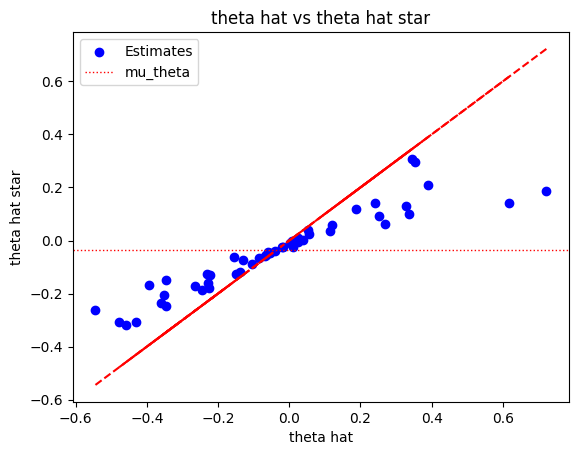

In [ ]:
plt.scatter(ols_controlled.coef, ols_controlled.theta_hat_star, label='Estimates', marker='o', color='blue')
plt.plot([ols_controlled.coef, ols_controlled.theta_hat_star], [ols_controlled.coef, ols_controlled.theta_hat_star], linestyle='--', color='red')
plt.axhline(y=mu_theta_hat_controlled, linestyle=':', color='red', label= 'mu_theta', linewidth=1)
plt.xlabel('theta hat')
plt.ylabel('theta hat star')
plt.legend()
plt.title('theta hat vs theta hat star')
plt.show()

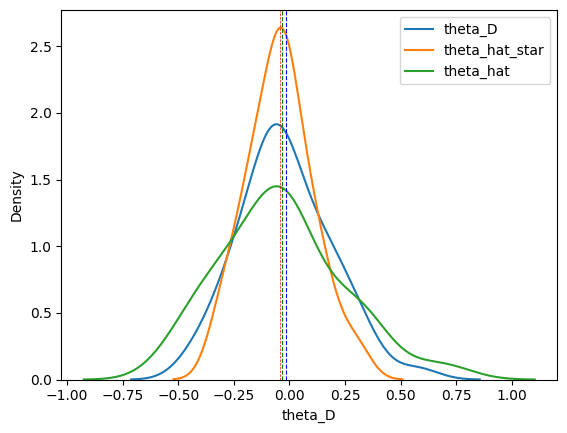

In [ ]:
sns.kdeplot(x=ols_controlled['theta_D'], label='theta_D')
sns.kdeplot(x=ols_controlled['theta_hat_star'], label='theta_hat_star')
sns.kdeplot(x=ols_controlled['coef'], label='theta_hat')
plt.axvline(np.mean(ols_controlled['theta_D']), color='blue', linestyle='dashed', linewidth=0.8)
plt.axvline(np.mean(ols_controlled['theta_hat_star']), color='red', linestyle='dashed', linewidth=0.5)
plt.axvline(np.mean(ols_controlled['coef']), color='green', linestyle='dashed', linewidth=0.8)

plt.legend()
plt.show()